

This notebook contains the work for Step 3 of the Data Science Method:

The Data Science Method

1.Problem Identification

2.Data Wrangling

         . Data Collection
         . Data Organization
         . Data Definition
         . Data Cleaning

3.Exploratory Data Analysis

   . Build data profile tables and plots

     - Outliers & Anomalies

   . Explore data relationships
   
   . Identification and creation of features</b>

1.Pre-processing and Training Data Development

       . Create dummy or indicator features for categorical variables
       . Standardize the magnitude of numeric features
       . Split into testing and training datasets
       . Apply scaler to the testing set

2.Modeling

       . Fit Models with Training Data Set
       . Review Model Outcomes — Iterate over additional models as needed.
       . Identify the Final Model
3.Documentation

       . Review the Results
       . Present and share your findings - storytelling
       . Finalize Code
       . Finalize Documentation



In [135]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import chi2_contingency

In [136]:
pd.set_option('display.max_rows', 1500)

In [173]:
# load the data saved from step 2
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Build data profile tables and plots

In [165]:
# Print out the summary stats table
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


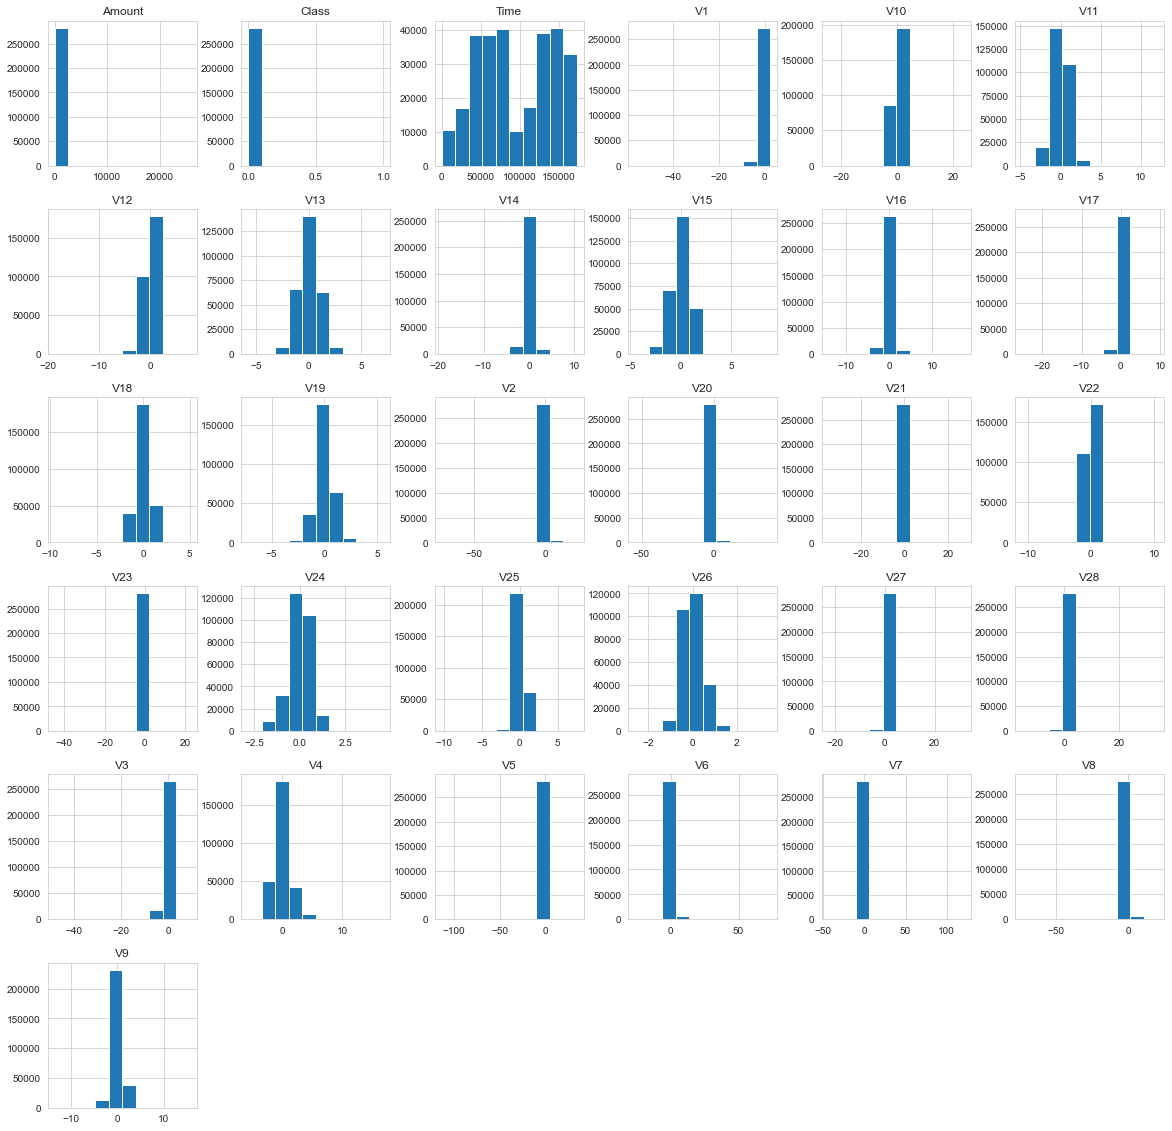

In [168]:
# print histograms
df.hist(bins=10, figsize=(20,20))
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [101]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


In [140]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Examine the class label imbalance

In [141]:
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 283726
    Positive: 473 (0.17% of total)



Fraud and Normal transaction analysis

Text(0, 0.5, 'Frequency')

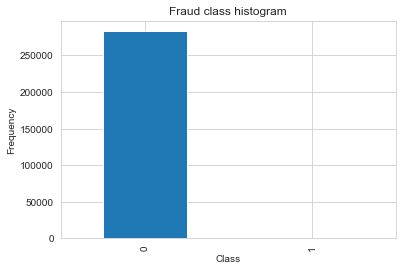

In [142]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [158]:

print('valid Cases:', round(df['Class'].value_counts()[0] / df.shape[0] * 100, 2))
print('Fraud Cases:', round(df['Class'].value_counts()[1] / df.shape[0] * 100, 2))

valid Cases: 99.83
Fraud Cases: 0.17


In [152]:
fraud = df[df.Class == 1]
valid = df[df.Class == 0]
outlier_fraction = len(frauds)/float(len(valid))
print(outlier_fraction)
print('fraud transactions: {}'.format(len(df[df.Class == 1])))
print('Non fraudulent transactions: {}'.format(len(df[df.Class == 0])))

0.0016698852262818046
fraud transactions: 473
Non fraudulent transactions: 283253


In [144]:
frauds.shape

(473, 31)

In [145]:
valid.shape

(283253, 31)

In [146]:
frauds.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [147]:
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

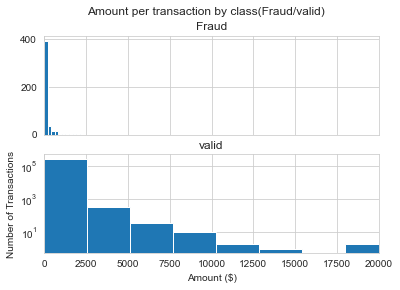

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per transaction by class(Fraud/valid)')

bins = 10

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(valid.Amount, bins = bins)
ax2.set_title('valid')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

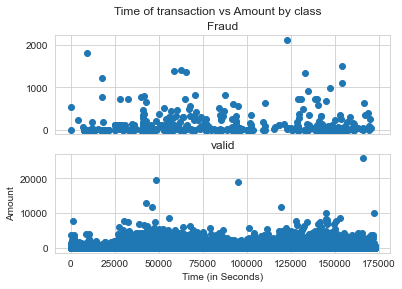

In [149]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(valid.Time, valid.Amount)
ax2.set_title('valid')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

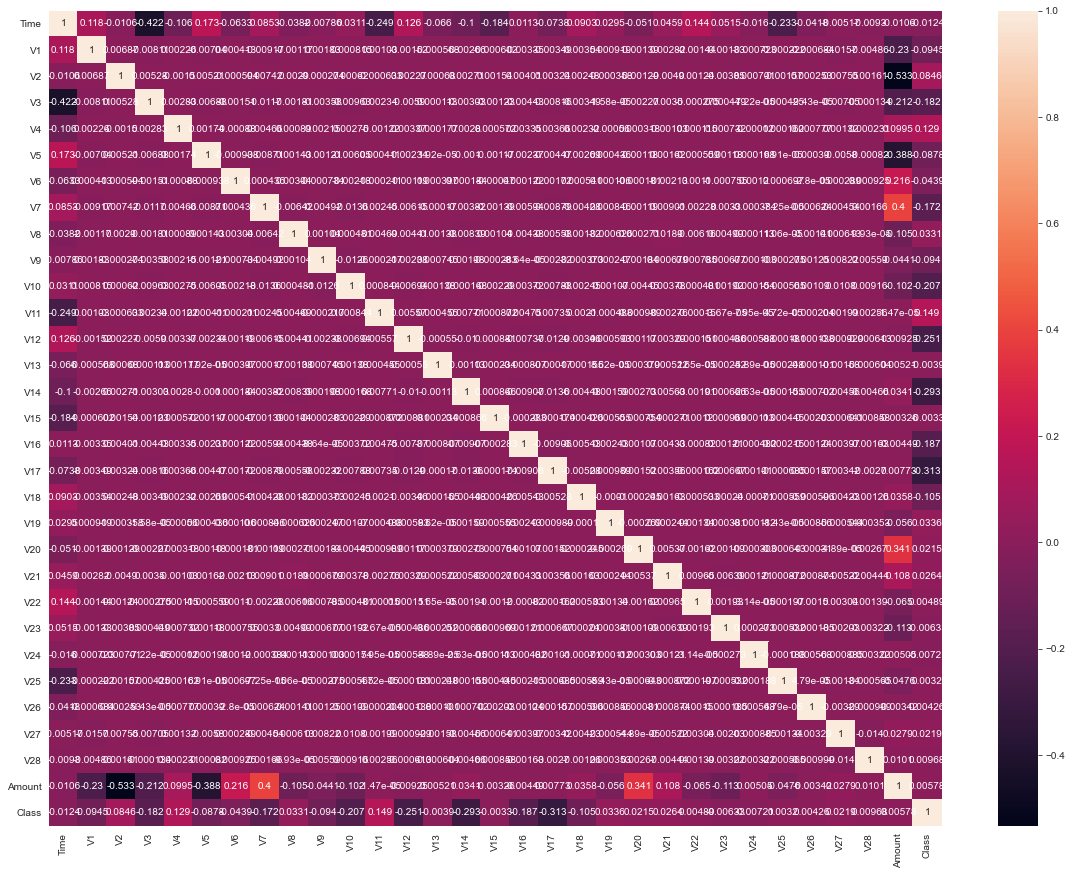

In [157]:
# calculate the correlation matrix
corr = df.corr()

plt.subplots(figsize=(20,15))
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.3g')

In [174]:
df.to_csv(r'C:\Users\arna_mora\Springboard\unit 7\creditcard.csv', index = False)